In [61]:
import pandas as pd
df= pd.read_csv("D:\\C downs\\used_cars_data.csv")
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [62]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [63]:
df.shape

(7253, 14)

In [64]:
def convert_mileage(mileage):
    # Check if mileage is a string
    if isinstance(mileage, str):
        # If 'km/kg' is in mileage
        if 'km/kg' in mileage:
            # Extract the numeric part and convert to float
            value = float(mileage.replace(' km/kg', ''))
            # Convert from km/kg to kmpl
            return value * 1.42903
        # If 'kmpl' is in mileage
        elif 'kmpl' in mileage:
            # Extract the numeric part and convert to float
            return float(mileage.replace(' kmpl', ''))
    # If mileage is not a string, return mileage as is
    return mileage

# Apply the conversion to the 'Mileage' column
df['Mileage'] = df['Mileage'].apply(convert_mileage)
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,38.012198,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.670000,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.200000,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.770000,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200000,1968 CC,140.8 bhp,5.0,NaN,17.74


In [65]:
# Convert 'Mileage' column to numeric, forcing non-numeric values to NaN
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')

# Calculate the mean of the 'Mileage' column (excluding NaN values)
mileage_mean = df['Mileage'].mean()

# Replace NaN values in 'Mileage' column with the mean
df.loc[:, 'Mileage'] = df['Mileage'].fillna(mileage_mean)
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [66]:
# Remove 'CC' from 'Engine' column for non-null values
df.loc[df['Engine'].notna(), 'Engine'] = df['Engine'].str.replace(' CC', '')

# Convert 'Engine' column to numeric, forcing non-numeric values to NaN
df['Engine'] = pd.to_numeric(df['Engine'], errors='coerce')

# Calculate the mean of the 'Engine' column (excluding NaN values)
engine_mean = df['Engine'].mean()

# Replace NaN values in 'Engine' column with the mean
df.loc[:, 'Engine'] = df['Engine'].fillna(engine_mean)

# Remove 'bhp' from 'Power' column for non-null values
df.loc[df['Power'].notna(), 'Power'] = df['Power'].str.replace(' bhp', '')

# Convert 'Power' column to numeric, forcing non-numeric values to NaN
df['Power'] = pd.to_numeric(df['Power'], errors='coerce')

# Calculate the mean of the 'Power' column (excluding NaN values)
power_mean = df['Power'].mean()

# Replace NaN values in 'Power' column with the mean
df.loc[:, 'Power'] = df['Power'].fillna(power_mean)


In [67]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [68]:
df = df.drop('New_Price', axis=1)

In [69]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                  53
Price                1234
dtype: int64

In [70]:
# Calculate the mean of the 'Seats' column (excluding NaN values)
seats_mean = df['Seats'].mean()

# Replace NaN values in 'Seats' column with the mean
df.loc[:, 'Seats'] = df['Seats'].fillna(seats_mean)

# Calculate the mean of the 'Price' column (excluding NaN values)
price_mean = df['Price'].mean()

# Replace NaN values in 'Price' column with the mean
df.loc[:, 'Price'] = df['Price'].fillna(price_mean)


In [71]:
df.isnull().sum()

S.No.                0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [72]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,38.012198,998.0,58.16,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.670000,1582.0,126.20,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.200000,1199.0,88.70,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.770000,1248.0,88.76,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200000,1968.0,140.80,5.0,17.74


In [73]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in df.columns:
    # Compare if the dtype is object
    if df[col].dtype=='object':
    # Use LabelEncoder to do the numeric transformation
        df[col]=le.fit_transform(df[col])


In [74]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,1310,9,2010,72000,0,1,0,38.012198,998.0,58.16,5.0,1.75
1,1,560,10,2015,41000,1,1,0,19.670000,1582.0,126.20,5.0,12.50
2,2,529,2,2011,46000,4,1,0,18.200000,1199.0,88.70,5.0,4.50
3,3,1160,2,2012,87000,1,1,0,20.770000,1248.0,88.76,7.0,6.00
4,4,23,3,2013,40670,1,0,2,15.200000,1968.0,140.80,5.0,17.74


In [75]:
df = df.drop('S.No.', axis=1)
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [76]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1310,9,2010,72000,0,1,0,38.012198,998.0,58.16,5.0,1.75
1,560,10,2015,41000,1,1,0,19.670000,1582.0,126.20,5.0,12.50
2,529,2,2011,46000,4,1,0,18.200000,1199.0,88.70,5.0,4.50
3,1160,2,2012,87000,1,1,0,20.770000,1248.0,88.76,7.0,6.00
4,23,3,2013,40670,1,0,2,15.200000,1968.0,140.80,5.0,17.74


In [77]:
# import numpy as np
corr= df.corr()
corr

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
Name,1.000000,0.033469,0.016406,0.031892,-0.072004,0.136026,-0.026578,-0.011064,0.023746,-0.147955,0.162929,-0.092164
Location,0.033469,1.000000,-0.027455,-0.035586,0.113209,0.048700,-0.029547,0.028157,-0.077912,-0.068498,-0.034488,-0.105744
Year,0.016406,-0.027455,1.000000,-0.187859,-0.131888,-0.099975,-0.385503,0.304107,-0.054233,0.012855,0.008137,0.279449
Kilometers_Driven,0.031892,-0.035586,-0.187859,1.000000,-0.109530,0.031166,0.088485,-0.065874,0.094765,0.030074,0.090162,-0.011318
Fuel_Type,-0.072004,0.113209,-0.131888,-0.109530,1.000000,0.125346,0.048425,-0.170372,-0.405441,-0.262341,-0.294250,-0.278092
Transmission,0.136026,0.048700,-0.099975,0.031166,0.125346,1.000000,0.001272,0.320878,-0.492782,-0.636225,0.079073,-0.535699
Owner_Type,-0.026578,-0.029547,-0.385503,0.088485,0.048425,0.001272,1.000000,-0.145645,0.049888,0.028523,0.007980,-0.086408
Mileage,-0.011064,0.028157,0.304107,-0.065874,-0.170372,0.320878,-0.145645,1.000000,-0.569304,-0.491227,-0.296120,-0.274817
Engine,0.023746,-0.077912,-0.054233,0.094765,-0.405441,-0.492782,0.049888,-0.569304,1.000000,0.853067,0.399033,0.604829
Power,-0.147955,-0.068498,0.012855,0.030074,-0.262341,-0.636225,0.028523,-0.491227,0.853067,1.000000,0.094826,0.704212


In [78]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_standardized = scaler.fit_transform(df)

df_standardized = pd.DataFrame(df_standardized, columns=df.columns)
corr= df_standardized.corr()
corr

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
Name,1.000000,0.033469,0.016406,0.031892,-0.072004,0.136026,-0.026578,-0.011064,0.023746,-0.147955,0.162929,-0.092164
Location,0.033469,1.000000,-0.027455,-0.035586,0.113209,0.048700,-0.029547,0.028157,-0.077912,-0.068498,-0.034488,-0.105744
Year,0.016406,-0.027455,1.000000,-0.187859,-0.131888,-0.099975,-0.385503,0.304107,-0.054233,0.012855,0.008137,0.279449
Kilometers_Driven,0.031892,-0.035586,-0.187859,1.000000,-0.109530,0.031166,0.088485,-0.065874,0.094765,0.030074,0.090162,-0.011318
Fuel_Type,-0.072004,0.113209,-0.131888,-0.109530,1.000000,0.125346,0.048425,-0.170372,-0.405441,-0.262341,-0.294250,-0.278092
Transmission,0.136026,0.048700,-0.099975,0.031166,0.125346,1.000000,0.001272,0.320878,-0.492782,-0.636225,0.079073,-0.535699
Owner_Type,-0.026578,-0.029547,-0.385503,0.088485,0.048425,0.001272,1.000000,-0.145645,0.049888,0.028523,0.007980,-0.086408
Mileage,-0.011064,0.028157,0.304107,-0.065874,-0.170372,0.320878,-0.145645,1.000000,-0.569304,-0.491227,-0.296120,-0.274817
Engine,0.023746,-0.077912,-0.054233,0.094765,-0.405441,-0.492782,0.049888,-0.569304,1.000000,0.853067,0.399033,0.604829
Power,-0.147955,-0.068498,0.012855,0.030074,-0.262341,-0.636225,0.028523,-0.491227,0.853067,1.000000,0.094826,0.704212


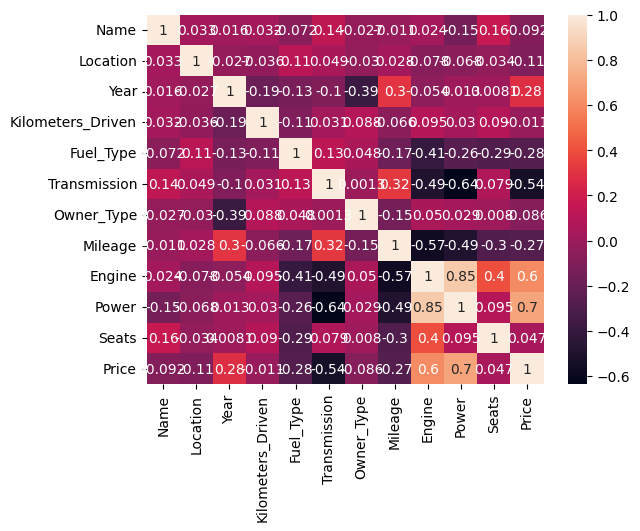

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr, annot=True)

plt.show()


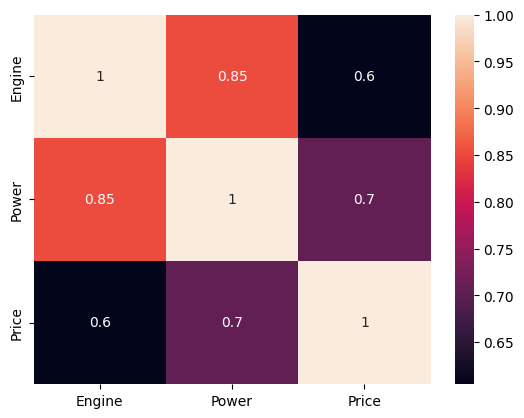

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()

target_corr = corr['Price']

mask = target_corr > 0.5

columns_to_keep = df.columns[mask]

df_new = df[columns_to_keep]

corr_new = df_new.corr()

sns.heatmap(corr_new, annot=True)

plt.show()


In [81]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = df.drop('Price', axis=1)  # Features
y = df['Price']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the most useful features in df correlated to 'Price'
correlation = df.corr()
price_corr = correlation['Price'].sort_values(ascending=False)
print(price_corr)


Price                1.000000
Power                0.704212
Engine               0.604829
Year                 0.279449
Seats                0.047318
Kilometers_Driven   -0.011318
Owner_Type          -0.086408
Name                -0.092164
Location            -0.105744
Mileage             -0.274817
Fuel_Type           -0.278092
Transmission        -0.535699
Name: Price, dtype: float64


In [82]:
df = df.drop(['Seats', 'Kilometers_Driven', 'Owner_Type', 'Name', 'Location','Transmission', 'Mileage'], axis=1)
df.head()

,Year,Fuel_Type,Engine,Power,Price
0,2010,0,998.0,58.16,1.75
1,2015,1,1582.0,126.20,12.50
2,2011,4,1199.0,88.70,4.50
3,2012,1,1248.0,88.76,6.00
4,2013,1,1968.0,140.80,17.74


In [83]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

# Create a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")


Mean Absolute Error (MAE): 2.577608331779286
Mean Squared Error (MSE): 20.888295732016193
R^2 Score: 0.7845439922967148


In [84]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regressor
gb = GradientBoostingRegressor(random_state=42)

# Train the model
gb.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb.predict(X_test)

# Calculate metrics
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting Regressor - MAE: {mae_gb}, MSE: {mse_gb}, R^2 Score: {r2_gb}")


Gradient Boosting Regressor - MAE: 2.6752997317900293, MSE: 22.349573430797914, R^2 Score: 0.7694713859354985


In [85]:
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)

# Train the model
dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test)

# Calculate metrics
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Regressor - MAE: {mae_dt}, MSE: {mse_dt}, R^2 Score: {r2_dt}")


Decision Tree Regressor - MAE: 3.2382991208977683, MSE: 38.56836316244507, R^2 Score: 0.602179820831712


In [86]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
lr = LinearRegression()

# Train the model
lr.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr.predict(X_test)

# Calculate metrics
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MAE: {mae_lr}, MSE: {mse_lr}, R^2 Score: {r2_lr}")


Linear Regression - MAE: 3.810155351574259, MSE: 51.540291116680294, R^2 Score: 0.46837858376140573
